Classification
k-NN
Ko'krak saratonini aniqlash

Tavsif:

Ko'krak saratoni dunyodagi ayollar orasida eng keng tarqalgan saraton hisoblanadi. Bu barcha saraton holatlarining 25 foizini tashkil qiladi. Ko'krark saratoni ko'krakdagi hujayralar nazoratsiz o'sishidan boshlanadi. Ushbu hujayralar odatda rentgen nurlari orqali ko'rish mumkin bo'lgan o'simtalarni tahlil qilish orqali aniqlanadi.

Ushbu ma'lumotlar to'plami Kaggle'dan olingan.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
415,905686,B,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,...,13.05,27.21,85.09,522.9,0.1426,0.21870,0.1164,0.08263,0.3075,0.07351
384,902727,B,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,...,14.24,17.37,96.59,623.7,0.1166,0.26850,0.2866,0.09173,0.2736,0.07320
255,886452,M,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,...,16.39,22.07,108.10,826.0,0.1512,0.32620,0.3209,0.13740,0.3068,0.07957
437,909220,B,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,15.66,21.58,101.20,750.0,0.1195,0.12520,0.1117,0.07453,0.2725,0.07234
364,9010877,B,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,...,14.73,21.70,93.76,663.5,0.1213,0.16760,0.1364,0.06987,0.2741,0.07582
499,91485,M,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,...,23.86,30.76,163.20,1760.0,0.1464,0.35970,0.5179,0.21130,0.2480,0.08999
399,904357,B,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,...,13.45,24.49,86.00,562.0,0.1244,0.17260,0.1449,0.05356,0.2779,0.08121
474,911391,B,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,...,11.94,19.35,80.78,433.1,0.1332,0.38980,0.3365,0.07966,0.2581,0.10800
96,86211,B,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
39,855138,M,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,...,15.53,26.02,107.30,740.4,0.1610,0.42250,0.5030,0.22580,0.2807,0.10710


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dataset ko'krakdagi o'simta haqida ma'lumotlarni jamlagan. 

diagnosis ustuni esa 

o'simta rak (M - malignant) yoki 

rak emas (B - benign) anglatadi.

In [6]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Bu qiymatlarni 0 va 1 ga o'zgartiramiz. M->1, B->0

Buning uchun yoki sklearn tarkibidagi LabelEncoder dan yoki pandas dagi .replace() metodidan foydalanish mumkin. Biz ikkisini ham qoldiramiz.

In [8]:
# o'zgartirish uchun birinchi usul

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df["diagnosis"] = labelencoder.fit_transform(df["diagnosis"].values)

In [9]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [10]:
# o'zgartirish uchun ikkinchi usul

df["diagnosis"] = df["diagnosis"].replace("M", 1)
df["diagnosis"] = df["diagnosis"].replace("B", 0)

In [11]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
# bizga keraksiz ID ustunini tashlab yuboramiz

df = df.drop("id", axis = 1)

In [16]:
# endi asosiy vazifamiz bo'lgan bog'liqligini aniqlaymiz

corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [22]:
# bizga eng muhim factor diagnosis orqali corralation chiqarib tartiblaymiz

corrwith_diagnosis = df.corrwith(df["diagnosis"]).abs().sort_values(ascending = False)
corrwith_diagnosis

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

ML ga tayyorlaymiz

In [24]:
X = df.drop("diagnosis", axis = 1).values
y = df["diagnosis"]

In [25]:
# Machine learning yaxshi ishlashi uchun hamma ustundagi qiymatlar 0 va 1 oralig'ida bo'lishi yaxshi

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Machine Learning

In [28]:
# train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

In [30]:
# k-nearest neighbour

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) # k = 5

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_predict = knn.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

Modelimizni Baholash

Jaccard index

In [33]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.875

Confusion matrix

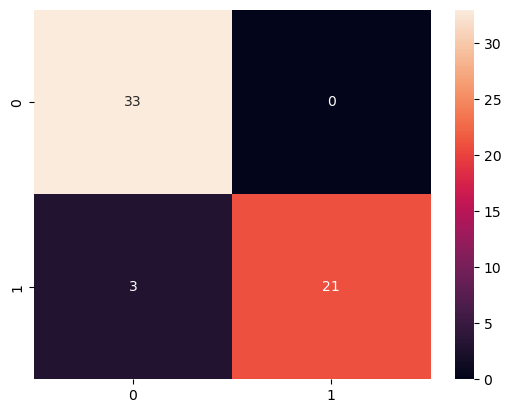

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [36]:
# oddiy array sifatida ko'rish

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[33,  0],
       [ 3, 21]], dtype=int64)

Precision, recall, F1

In [37]:
# 1-usul

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=1.0
recall=0.875
f1=0.9333333333333333
accuracy=0.9473684210526315


In [39]:
# 2-usul

from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.88      0.93        24

    accuracy                           0.95        57
   macro avg       0.96      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



umuman olganda K ta qo'shnini sonini qanday Eng yaxshi k ni topish mumkin?

1-usul : for yordamida

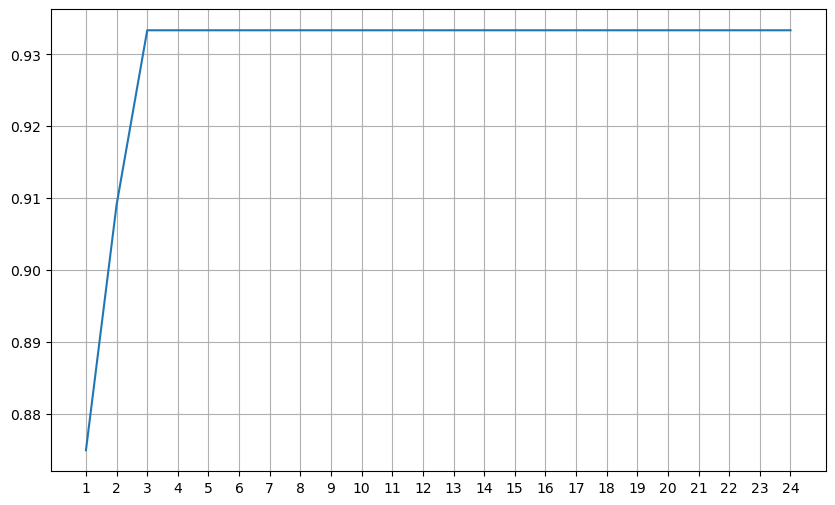

In [40]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

Grid Search yordamida

In [41]:
from sklearn.model_selection import GridSearchCV

parametr_grid = {"n_neighbors" : np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, parametr_grid, cv = 5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [47]:
knn_gscv.cv_results_

{'mean_fit_time': array([0.00639653, 0.00199857, 0.00139904, 0.001999  , 0.00159984,
        0.00159864, 0.00159941, 0.00139947, 0.00139956, 0.00119963,
        0.00179954, 0.00159984, 0.00119967, 0.00139933, 0.00139852,
        0.0011991 , 0.00119925, 0.00119963, 0.00119948, 0.00159965,
        0.00139894, 0.00140018, 0.00159807, 0.00139904]),
 'std_fit_time': array([0.00881758, 0.00089378, 0.0004894 , 0.00063181, 0.00080016,
        0.00049002, 0.00048938, 0.00048953, 0.00048887, 0.00039964,
        0.00074819, 0.00080034, 0.00039938, 0.00048926, 0.00048846,
        0.00039966, 0.00040066, 0.00040023, 0.00039995, 0.00048947,
        0.00048908, 0.00049051, 0.00048936, 0.0004891 ]),
 'mean_score_time': array([0.06535873, 0.06256185, 0.05436749, 0.08095136, 0.05216665,
        0.05276809, 0.05236697, 0.05256786, 0.0521668 , 0.05196733,
        0.0521668 , 0.0521668 , 0.05296636, 0.05296764, 0.05236669,
        0.05336733, 0.05276756, 0.05216689, 0.05196772, 0.0537663 ,
        0.053765

In [48]:
knn_gscv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16])

In [43]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [44]:
knn_gscv.best_score_

0.968390001552554

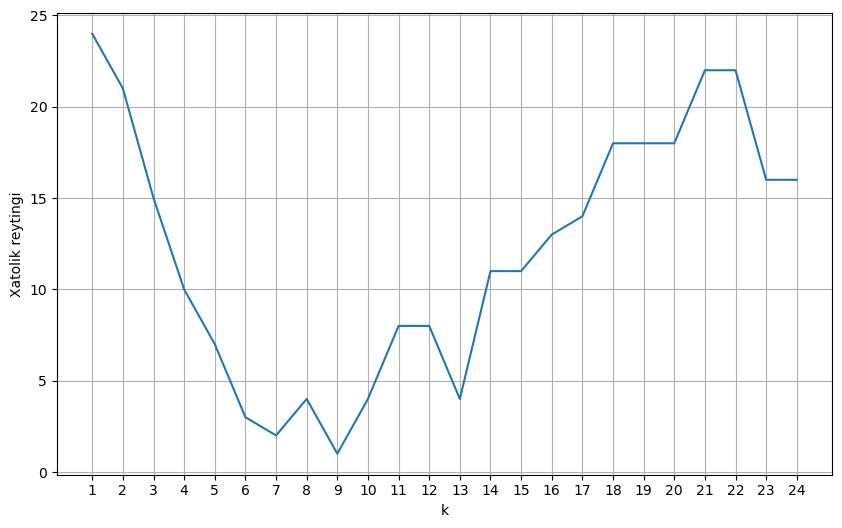

In [46]:
plt.figure(figsize=(10,6))
plt.plot(parametr_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(parametr_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()